# <center> Linear Regression - Final Challenge 2</center>
## <br/><center>Scott Linne <br/>September 2018</center>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# Read Data from course spreadsheet files

In [2]:
AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')
AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')
AW_Test = pd.read_csv('AW_test.csv')

## Check data loaded by looking at top rows of each dataset

In [3]:
AveMonthSpend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [4]:
BikeBuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [5]:
AdvWorksCusts.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [6]:
AW_Test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


## look at shape of each dataset

In [7]:
print(AveMonthSpend.shape)
print(BikeBuyer.shape)
print(AdvWorksCusts.shape)
print(AW_Test.shape)

(16519, 2)
(16519, 2)
(16519, 23)
(500, 23)


## Remove duplicate values from monthspend, bikebuyer, and AdvCusts datasets

In [8]:
AveMonthSpend = AveMonthSpend.drop_duplicates('CustomerID')
BikeBuyer = BikeBuyer.drop_duplicates('CustomerID')
AdvWorksCusts = AdvWorksCusts.drop_duplicates('CustomerID')
print(AveMonthSpend.shape)
print(BikeBuyer.shape)
print(AdvWorksCusts.shape)

(16404, 2)
(16404, 2)
(16404, 23)


# join datasets to make one dataset

In [9]:
AdvWorksCustomers = pd.merge(AdvWorksCusts, AveMonthSpend, how='inner')

In [10]:
AdvWorksCustomers = pd.merge(AdvWorksCustomers, BikeBuyer, how='inner')

In [11]:
AdvWorksCustomers.shape

(16404, 25)

In [12]:
AdvWorksCustomers.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [13]:
# Check the datatypes of the new customers table
AdvWorksCustomers.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

### Convert Birthdate to a datetime value
<p> We will use birthdate and the date the data was collected (Jan 1, 1998) to add add a calculated column to show a customers age

In [14]:
AdvWorksCustomers['BirthDate'] = pd.to_datetime(AdvWorksCustomers['BirthDate'])

In [15]:
AdvWorksCustomers.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate               datetime64[ns]
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
dtype: object

### Add a column for Age

In [16]:
# customer birth year
birthyear = AdvWorksCustomers['BirthDate'].apply(lambda x: x.year)
# data collection year
start = datetime.date(1998, 1, 1).year

In [17]:
# Add column for customers Age
AdvWorksCustomers['Age'] = start - birthyear

In [18]:
AdvWorksCustomers.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,0,0,2,137947,89,0,32
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,1,3,3,101141,117,1,33
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,1,3,3,91945,123,0,33
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,1,0,0,86688,50,0,30
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,4,5,5,92771,95,1,30


In [19]:
# Binarize the MaritalStatus to 1 or 0
AdvWorksCustomers['Married'] = (AdvWorksCustomers['MaritalStatus'] == 'M')*1

In [20]:
AdvWorksCustomersCopy = AdvWorksCustomers.copy()

In [21]:
AdvWorksCustomersCopy['Occupation'].value_counts()

Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

In [22]:
AdvWorksCustomersCopy['Education'].value_counts()

Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

In [23]:
# Convert categorical variable Occupation to numeric variables for regression analysis
Career= {"Occupation": {"Professional": 1, "Skilled Manual": 2, "Management": 3, "Clerical": 4, "Manual": 5} }

In [24]:
School = {"Education":{"Partial High School": 1,"High School": 2, "Partial College": 3, "Bachelors ": 4, "Graduate Degree":5}}

In [25]:
AdvWorksCustomersCopy.replace(School, inplace=True)

In [26]:
AdvWorksCustomersCopy.replace(Career, inplace=True)

In [27]:
AdvWorksCustomersCopy['Occupation'].value_counts()

1    4922
2    4038
3    2718
4    2597
5    2129
Name: Occupation, dtype: int64

In [28]:
AdvWorksCustomersCopy['Education'].value_counts()

4    4758
3    4451
2    2944
5    2851
1    1400
Name: Education, dtype: int64

In [29]:
AdvWorksCustomersCopy.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate               datetime64[ns]
Education                        int64
Occupation                       int64
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
Age                      

## Declare the columns to use as features

In [30]:
AdvWorksCustomersCopy.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age', 'Married'],
      dtype='object')

In [56]:
# remove 'Education'
# remove 'Occupation'
# remove 'Married'
#'Education', 'Occupation','HomeOwnerFlag',
#'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
#'YearlyIncome', 'BikeBuyer', 'Age','Married'


features = ['Education', 'Occupation','HomeOwnerFlag','NumberCarsOwned', 
            'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age','Married']

## Specify a prediction target

In [57]:
target = 'AveMonthSpend'

### Extract features and target into Separate Dataframes

In [58]:
X = AdvWorksCustomersCopy[features]

In [59]:
y = AdvWorksCustomersCopy[target]

In [60]:
# look at a typical row from features
X.iloc[2]

Education                   4
Occupation                  1
HomeOwnerFlag               1
NumberCarsOwned             1
NumberChildrenAtHome        3
TotalChildren               3
YearlyIncome            91945
Age                        33
Married                     1
Name: 2, dtype: int64

## Display target values

In [61]:
y.head()

0     89
1    117
2    123
3     50
4     95
Name: AveMonthSpend, dtype: int64

## Split the data into train test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=324)

In [63]:
lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Perform prediction using linear regression model

In [64]:
y_prediction = lRegressor.predict(X_test)
y_prediction

array([ 69.44106318,  46.82876631,  59.75842246, ...,  80.32463593,
        62.62797298,  82.54807247])

## what is the mean of the expected target value

In [65]:
y_test.describe()

count    5414.000000
mean       72.429627
std        27.149546
min        22.000000
25%        52.000000
50%        68.000000
75%        84.000000
max       175.000000
Name: AveMonthSpend, dtype: float64

## Evaluate linear regression accuracy with RMSE

In [66]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [67]:
print(RMSE)

14.944430017020515


## Try the Decision Tree Regressor

In [68]:
DTRegressor = DecisionTreeRegressor(max_depth=10)
DTRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## perform prediction using Decision Tree Regressor

In [69]:
y_prediction = DTRegressor.predict(X_test)
y_prediction

array([ 58.4057971 ,  49.43594646,  53.75714286, ...,  85.83950617,
        66.95555556,  89.88235294])

## check the mean of the expected target 

In [70]:
y_test.describe()

count    5414.000000
mean       72.429627
std        27.149546
min        22.000000
25%        52.000000
50%        68.000000
75%        84.000000
max       175.000000
Name: AveMonthSpend, dtype: float64

## Evaluate Decision Tree Regressor accuracy using RMSE

In [71]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [72]:
print(RMSE)

13.478981624633905


In [73]:
y_prediction

array([ 58.4057971 ,  49.43594646,  53.75714286, ...,  85.83950617,
        66.95555556,  89.88235294])

In [74]:
print(y_prediction)

[ 58.4057971   49.43594646  53.75714286 ...,  85.83950617  66.95555556
  89.88235294]


In [75]:
pd.Series(y_prediction)

0        58.405797
1        49.435946
2        53.757143
3       125.777778
4       143.811321
5        45.444444
6        55.410714
7        90.520000
8        58.185185
9        49.435946
10       57.068966
11       63.055556
12       49.435946
13      104.000000
14       54.213636
15       74.615385
16       74.458333
17      127.250000
18       81.000000
19       60.600000
20       67.041667
21       56.190476
22       95.071429
23       89.282051
24       55.681818
25       77.542553
26       52.026316
27       47.418605
28      100.222222
29       57.068966
           ...    
5384     53.459459
5385     52.055319
5386     67.041667
5387     49.081633
5388    100.250000
5389     82.120000
5390     90.520000
5391     47.555556
5392     61.495298
5393     71.629213
5394     68.380952
5395     67.041667
5396     57.000000
5397     60.662791
5398     49.435946
5399    123.500000
5400     86.041667
5401     53.526882
5402     61.402299
5403    151.000000
5404     87.272727
5405    127.

In [76]:
import seaborn as sns
%matplotlib inline

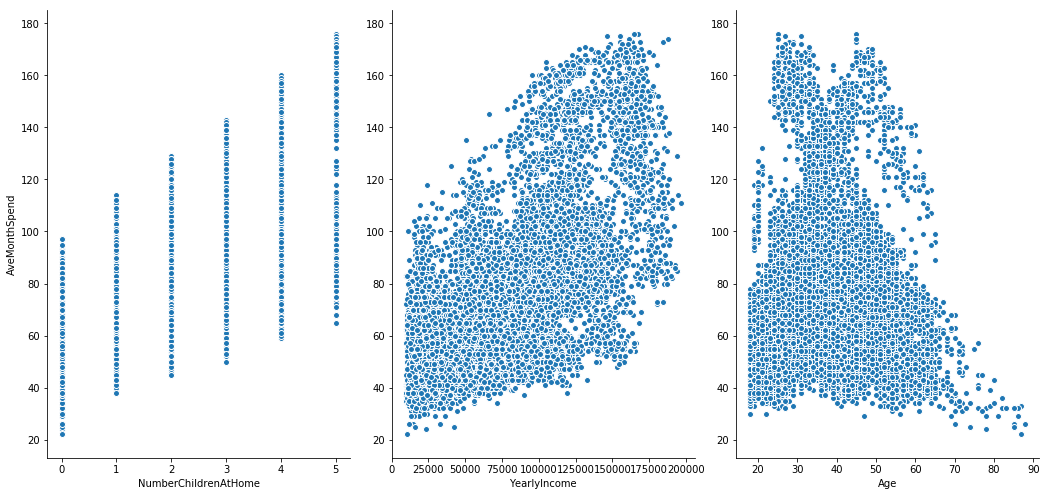

In [77]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(AdvWorksCustomersCopy, x_vars=['NumberChildrenAtHome','YearlyIncome', 'Age'], y_vars='AveMonthSpend', size=7, aspect=0.7)

In [78]:
y.describe()

count    16404.000000
mean        72.389905
std         27.269568
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

In [80]:
# Loaded test sample data in and prepare features like before
AW_Test.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [81]:
# calculate an Age for the customer
AW_Test['BirthDate'] = pd.to_datetime(AW_Test['BirthDate'])

In [83]:
# customer birth year
birthyear = AW_Test['BirthDate'].apply(lambda x: x.year)
# data collection year
start = datetime.date(1998, 1, 1).year

# Add column for customers Age
AW_Test['Age'] = start - birthyear

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,Bachelors,Management,F,S,0,2,0,5,86931,53
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,Graduate Degree,Management,F,M,1,2,0,4,103985,64
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,High School,Manual,F,M,1,1,2,2,21876,33


In [85]:
# Binarize the MaritalStatus to 1 or 0
AW_Test['Married'] = (AW_Test['MaritalStatus'] == 'M')*1

In [86]:
AW_TestCopy = AW_Test.copy()

In [87]:
AW_TestCopy['Occupation'].value_counts()

Professional      146
Skilled Manual    134
Management         91
Clerical           73
Manual             56
Name: Occupation, dtype: int64

In [88]:
AW_TestCopy['Education'].value_counts()

Bachelors              148
Partial College        144
Graduate Degree         85
High School             77
Partial High School     46
Name: Education, dtype: int64

In [90]:
AW_TestCopy.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Married
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,20268.290000,0.666000,1.592000,1.150000,2.188000,81795.474000,36.468000,0.564000
std,5385.050297,0.472112,1.136715,1.596433,1.696589,40627.641775,10.974235,0.496384
min,11018.000000,0.000000,0.000000,0.000000,0.000000,10588.000000,18.000000,0.000000
25%,15464.250000,0.000000,1.000000,0.000000,1.000000,50273.750000,28.000000,0.000000
50%,20452.000000,1.000000,2.000000,0.000000,2.000000,82298.000000,35.000000,1.000000
75%,24789.000000,1.000000,2.000000,2.000000,4.000000,107067.750000,44.000000,1.000000
max,29483.000000,1.000000,4.000000,5.000000,5.000000,184897.000000,69.000000,1.000000


In [91]:
# Convert categorical variable Occupation to numeric variables for regression analysis
Career= {"Occupation": {"Professional": 1, "Skilled Manual": 2, "Management": 3, "Clerical": 4, "Manual": 5} }

In [92]:
School = {"Education":{"Partial High School": 1,"High School": 2, "Partial College": 3, "Bachelors ": 4, "Graduate Degree":5}}

In [93]:
AW_TestCopy['Education'].value_counts()

Bachelors              148
Partial College        144
Graduate Degree         85
High School             77
Partial High School     46
Name: Education, dtype: int64

In [94]:
AW_TestCopy.replace(School, inplace=True)

In [95]:
AW_TestCopy['Education'].value_counts()

4    148
3    144
5     85
2     77
1     46
Name: Education, dtype: int64

In [96]:
AW_TestCopy.replace(Career, inplace=True)

In [98]:
AW_TestCopy['Occupation'].value_counts()

1    146
2    134
3     91
4     73
5     56
Name: Occupation, dtype: int64

In [100]:
AW_TestCopy.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate               datetime64[ns]
Education                        int64
Occupation                       int64
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
Age                              int64
Married                          int64
dtype: object

In [101]:
## set columns to use as features
AW_TestCopy.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age', 'Married'],
      dtype='object')

In [102]:
features = ['Education', 'Occupation','HomeOwnerFlag','NumberCarsOwned', 
            'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age','Married']

## Perform prediction on the new test data (X)

In [106]:
X = AW_TestCopy[features]

In [107]:
## use the linear regressor
y_exam_prediction = lRegressor.predict(X)
y_exam_prediction

array([  55.25854372,   90.37500094,   63.61987746,   80.18895099,
         74.94363634,   56.50947877,   74.74328985,  107.04162198,
         88.52454228,   64.81182282,   77.32497167,   62.42416995,
         57.62053897,   58.55502753,   47.82187505,   65.68272033,
         75.5519518 ,   64.56764314,  132.38391174,   67.61505732,
         59.72398618,   60.65773368,  143.65018918,   76.0036698 ,
         69.4036861 ,   63.20450439,   68.71491359,  105.00600128,
         63.5663114 ,   83.43571159,   80.72805249,   75.30580327,
         49.0861365 ,   56.84792089,  119.23527986,   92.07850126,
        144.92437919,   80.10521959,   74.46235494,   69.53496483,
         59.01420663,   65.88020344,   71.12266492,   64.12049583,
         67.90868446,   62.03069815,   76.55376096,  100.95903361,
        112.13946465,   68.75958747,   70.99593648,  102.87049782,
         97.57159715,   49.1585793 ,   60.58866707,   58.8073159 ,
         69.71708235,   62.02495287,   43.625678  ,   57.57872

In [111]:
## Try the decision tree regressor
y_exam_predictiondt = DTRegressor.predict(X)
y_exam_predictiondt

array([  47.55555556,  107.69090909,   62.45454545,   85.83950617,
         67.07142857,   54.21363636,   65.14      ,  102.5       ,
         62.        ,   56.36363636,   69.33333333,   55.41071429,
         61.49529781,   47.41860465,   42.86363636,   62.47727273,
         82.12      ,   57.68421053,  137.        ,   67.69491525,
         58.88709677,   61.49529781,  151.        ,   76.02803738,
         58.4057971 ,   66.75      ,   69.55      ,  121.78571429,
         66.95555556,   80.25      ,   65.14      ,   73.23404255,
         47.41860465,   53.69767442,  105.12903226,  103.25      ,
        167.11111111,   72.6       ,   74.61538462,   69.55      ,
         53.52688172,   50.25      ,   71.62921348,   74.26804124,
         69.55      ,   61.49529781,   84.        ,  121.78571429,
        122.38095238,   61.6       ,   72.21428571,   90.        ,
         85.08      ,   52.02631579,   56.26470588,   61.49529781,
         61.40229885,   66.75438596,   54.23076923,   63.925  

In [116]:
DecisionTreePrediction = pd.Series(y_exam_predictiondt)

In [117]:
LinearPredictionList = pd.Series(y_exam_prediction)

In [118]:
LinearPredictionList.to_csv('AveMontlySpendLRPrediction.csv')
DecisionTreePrediction.to_csv('AveMonthlySpendDTPrediciton.csv')

In [119]:
features

['Education',
 'Occupation',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'Age',
 'Married']

In [123]:
features

['Education',
 'Occupation',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'Age',
 'Married']

In [125]:
X

,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Married
0,4,3,0,2,0,5,86931,53,0
1,4,2,1,2,2,4,100125,34,1
2,5,3,1,2,0,4,103985,64,1
3,5,2,1,0,0,4,127161,40,1
4,2,5,1,1,2,2,21876,33,1
5,3,4,1,1,0,1,44467,41,1
6,4,2,1,2,2,4,77702,34,0
7,4,1,1,3,4,4,99418,34,1
8,1,5,1,1,4,4,13522,32,0
9,4,2,1,1,1,1,46264,25,1


In [126]:
type(X)

pandas.core.frame.DataFrame

In [127]:
type(y)

pandas.core.series.Series